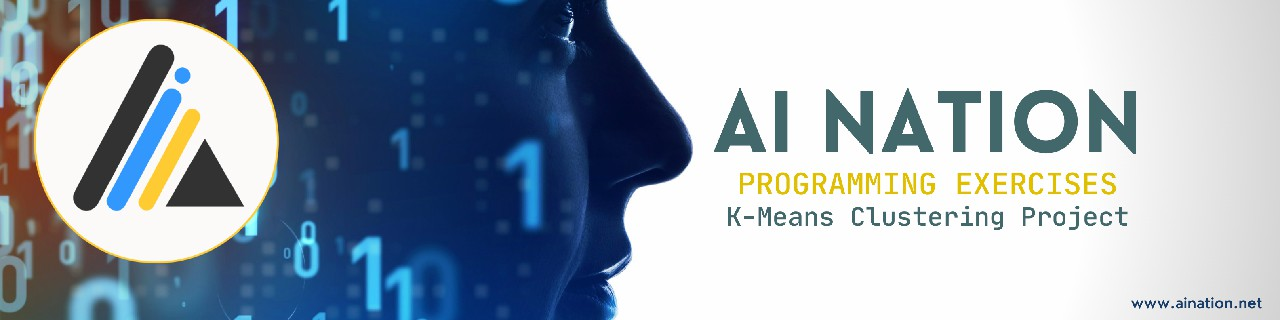

In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt


In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
cluster_data = titanic[['Fare','Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['Fare','Age'], inplace=True)
cluster_array = np.array(cluster_data)

In [4]:
cluster_array.shape

(714, 2)

In [5]:
def calc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [6]:
# Assign cluster clusters based on closest centroid
def assign_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [7]:
# Calculate new centroids based on each cluster's mean
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [8]:
# Calculate variance within each cluster
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster'] ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum((current_cluster - mean_repmat)**2))
    return sum_squares

# Understanding functions

In [9]:
k = 4
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
len(centroids)

4

In [10]:
clusters = assign_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))

0 253937


In [11]:
print(len(initial_clusters))

714


In [14]:



cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)

cluster_df.head()

,0,1,cluster
0,0.0,19.0,0
1,0.0,25.0,0
2,0.0,36.0,0
3,0.0,38.0,1
4,0.0,39.0,2


In [108]:
current_cluster = cluster_df[cluster_df['cluster'] ==1][cluster_df.columns[:-1]]
current_cluster.head()

,0,1
3,0.0000,38.0
24,7.0500,38.0
141,7.8958,38.0
208,8.6625,38.0
316,13.0000,38.0


In [109]:
import numpy.matlib
a0 = np.array(1)
np.matlib.repmat(a0, 2, 3)


array([[1, 1, 1],
       [1, 1, 1]])

# Train K-mean

In [15]:
for i in range(20):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = assign_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    

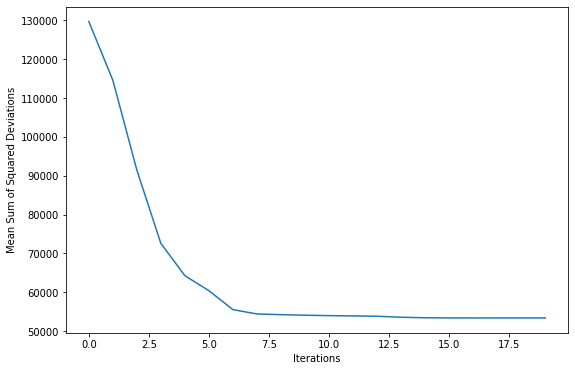

In [16]:

plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');
plt.show()

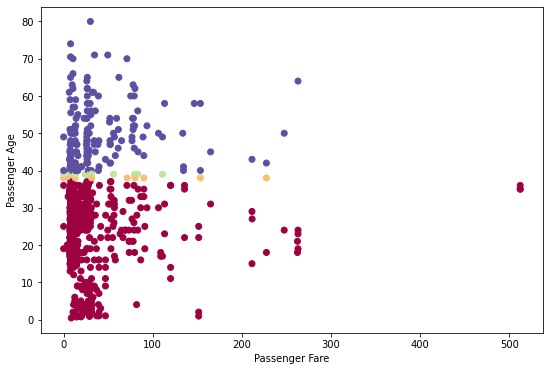

In [19]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');
plt.show();

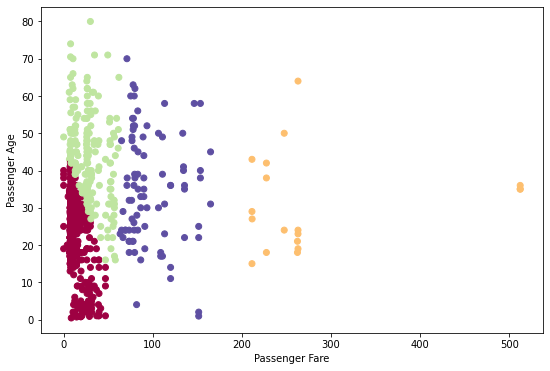

In [20]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('Passenger Fare')
plt.ylabel('Passenger Age');